<a href="https://colab.research.google.com/github/barrypr14/earthquake-damage-predict/blob/master/Richter's_Predictor_Modeling_Earthquake_Damage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Richter's Predictor: Modeling Earthquake Damage**
This is the machine learning contest in [DrivenData](https://www.drivendata.org/competitions/57/nepal-earthquake/page/135/), our approach achieved the top 3% on leaderboard. We have tried some robust machine learning model such as LightGBM, CatBoost, RandomForest and XGBoost. Moreover, we tested the ensemble and stack model.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv('/content/gdrive/MyDrive/CSCI_567_project/train.csv')
train_labels = pd.read_csv('/content/gdrive/MyDrive/CSCI_567_project/train_labels.csv')
test_data = pd.read_csv('/content/gdrive/MyDrive/CSCI_567_project/Test_Values.csv')

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.concat([train_data,test_data]).reset_index(drop=True)
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347464,310028,4,605,3623,3,70,20,6,t,r,...,1,0,0,0,0,0,0,0,0,0
347465,663567,10,1407,11907,3,25,6,7,n,r,...,0,0,0,0,0,0,0,0,0,0
347466,1049160,22,1136,7712,1,50,3,3,t,r,...,0,0,0,0,0,0,0,0,0,0
347467,442785,6,1041,912,2,5,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from statistics import mean

# **Data Visualization**

<Axes: xlabel='damage_grade', ylabel='count'>

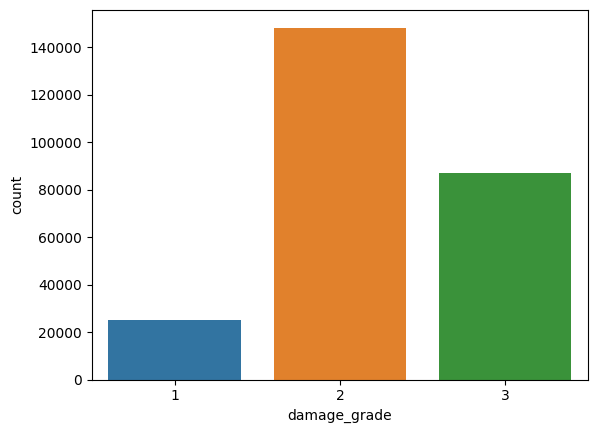

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=train_labels['damage_grade'])

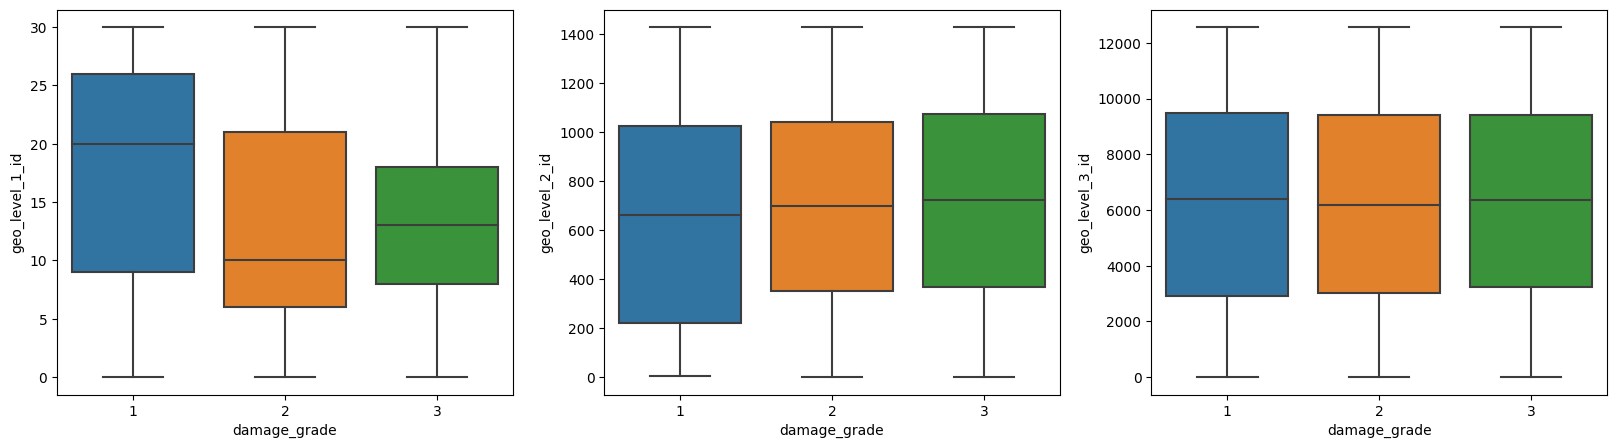

In [ ]:
fig , ax = plt.subplots(1,3, figsize = (20,5))
sns.boxplot(x=train_labels['damage_grade'] , y=train_data['geo_level_1_id'] , ax = ax[0])
sns.boxplot(x=train_labels['damage_grade'] , y=train_data['geo_level_2_id'] , ax = ax[1])
sns.boxplot(x=train_labels['damage_grade'], y=train_data['geo_level_3_id'] , ax=ax[2])
plt.show()

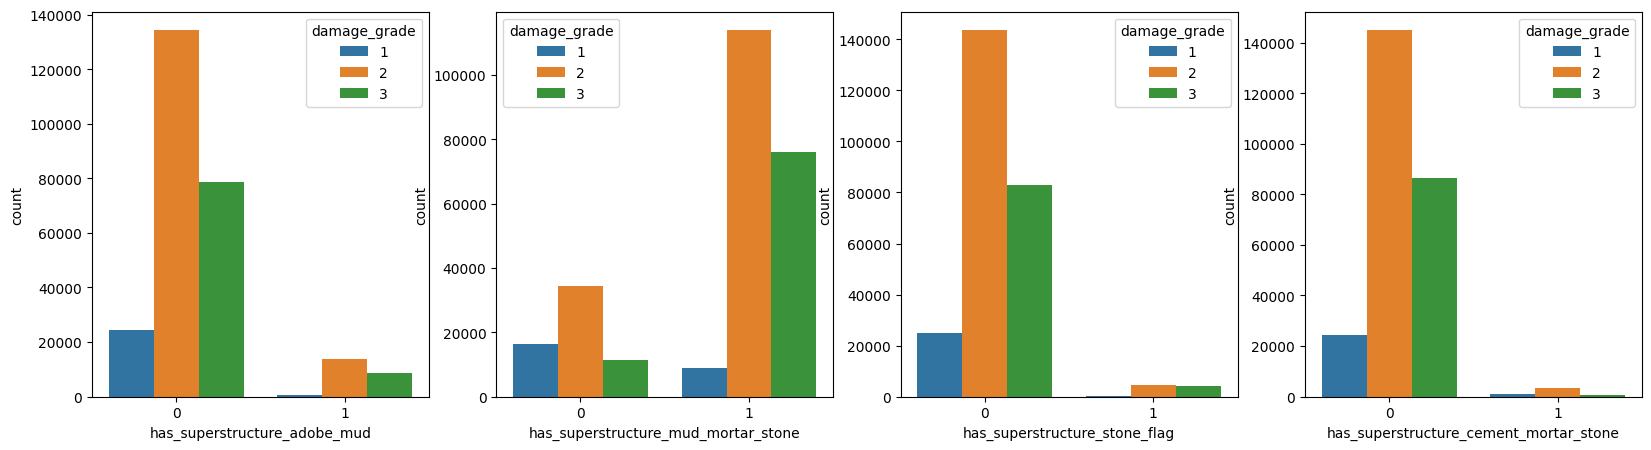

In [ ]:
fig , ax = plt.subplots(1,4, figsize = (20,5))
sns.countplot(x=train_data['has_superstructure_adobe_mud'] , hue=train_labels['damage_grade'] , ax = ax[0])
sns.countplot(x=train_data['has_superstructure_mud_mortar_stone'] , hue=train_labels['damage_grade'] , ax = ax[1])
sns.countplot(x=train_data['has_superstructure_stone_flag'], hue=train_labels['damage_grade'] , ax=ax[2])
sns.countplot(x=train_data['has_superstructure_cement_mortar_stone'] , hue=train_labels['damage_grade'], ax=ax[3])
plt.show()

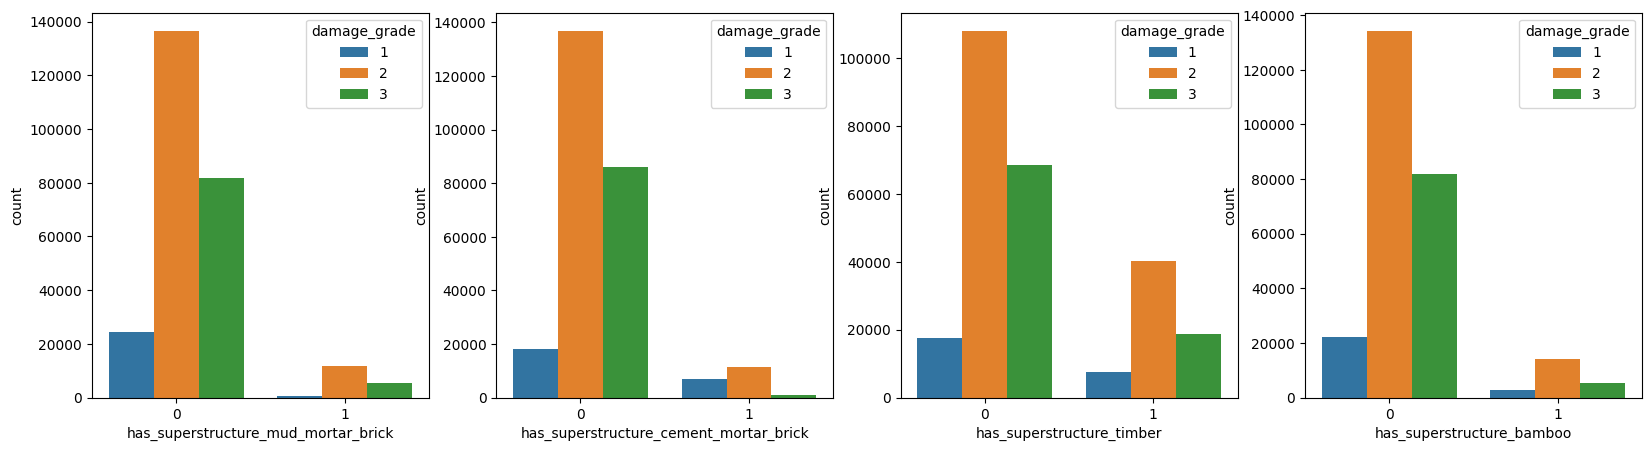

In [ ]:
fig , ax = plt.subplots(1,4, figsize = (20,5))
sns.countplot(x=train_data['has_superstructure_mud_mortar_brick'] , hue=train_labels['damage_grade'] , ax = ax[0])
sns.countplot(x=train_data['has_superstructure_cement_mortar_brick'] , hue=train_labels['damage_grade'] , ax = ax[1])
sns.countplot(x=train_data['has_superstructure_timber'], hue=train_labels['damage_grade'] , ax=ax[2])
sns.countplot(x=train_data['has_superstructure_bamboo'] , hue=train_labels['damage_grade'], ax=ax[3])
plt.show()

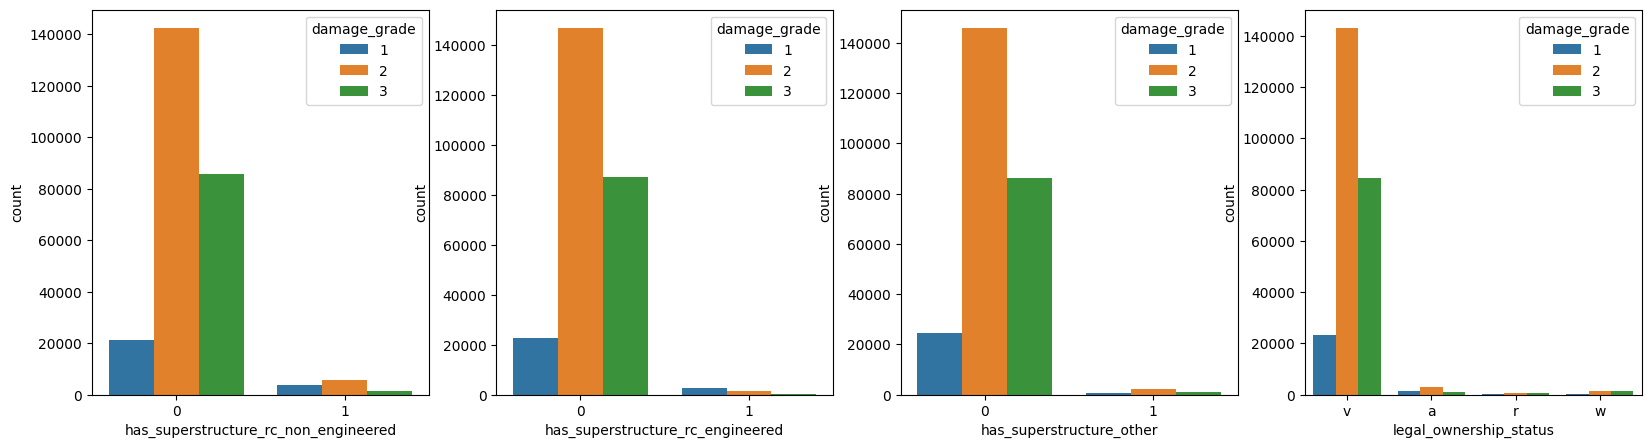

In [ ]:
fig , ax = plt.subplots(1,4, figsize = (20,5))
sns.countplot(x=train_data['has_superstructure_rc_non_engineered'] , hue=train_labels['damage_grade'] , ax = ax[0])
sns.countplot(x=train_data['has_superstructure_rc_engineered'] , hue=train_labels['damage_grade'] , ax = ax[1])
sns.countplot(x=train_data['has_superstructure_other'], hue=train_labels['damage_grade'] , ax=ax[2])
sns.countplot(x=train_data['legal_ownership_status'] , hue=train_labels['damage_grade'], ax=ax[3])
plt.show()

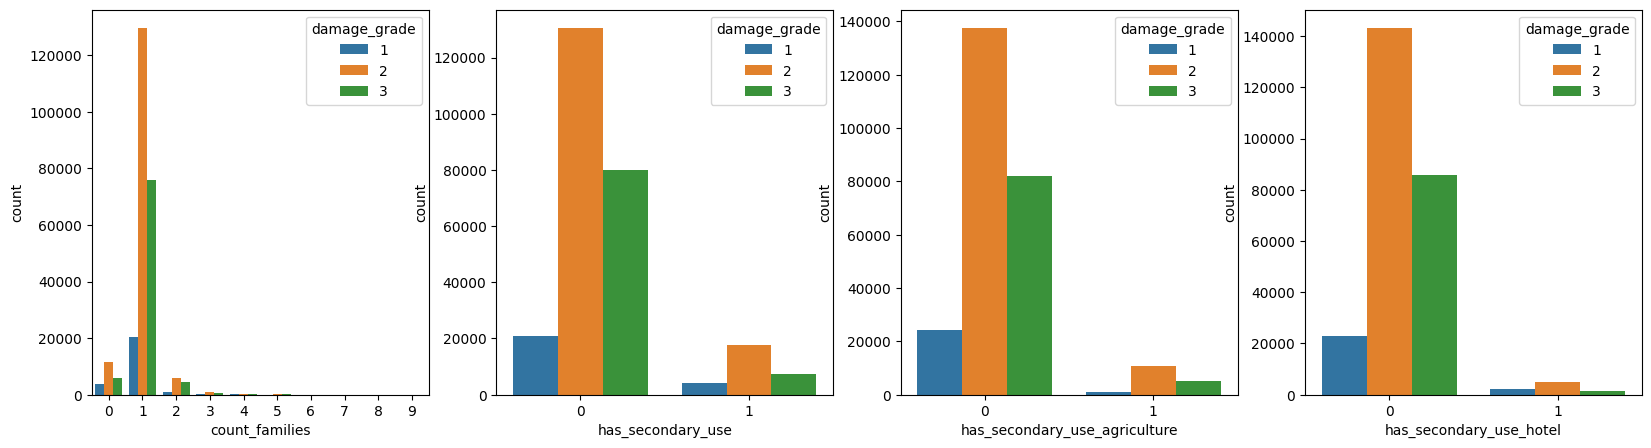

In [ ]:
fig , ax = plt.subplots(1,4, figsize = (20,5))
sns.countplot(x=train_data['count_families'] , hue=train_labels['damage_grade'] , ax = ax[0])
sns.countplot(x=train_data['has_secondary_use'] , hue=train_labels['damage_grade'] , ax = ax[1])
sns.countplot(x=train_data['has_secondary_use_agriculture'], hue=train_labels['damage_grade'] , ax=ax[2])
sns.countplot(x=train_data['has_secondary_use_hotel'] , hue=train_labels['damage_grade'], ax=ax[3])
plt.show()

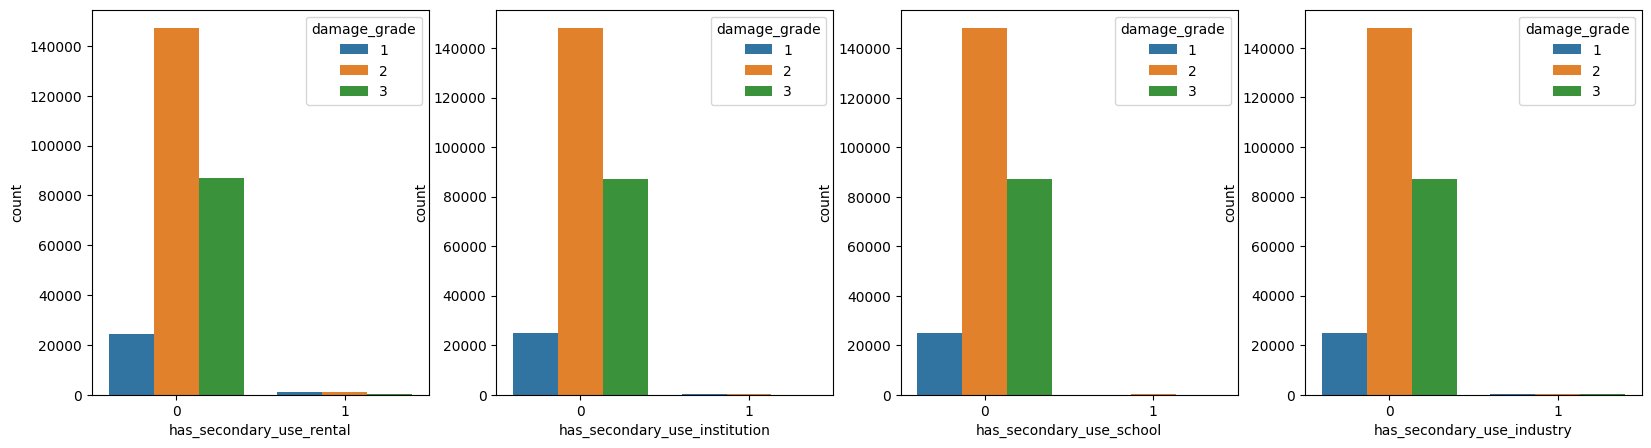

In [ ]:
fig , ax = plt.subplots(1,4, figsize = (20,5))
sns.countplot(x=train_data['has_secondary_use_rental'] , hue=train_labels['damage_grade'] , ax = ax[0])
sns.countplot(x=train_data['has_secondary_use_institution'] , hue=train_labels['damage_grade'] , ax = ax[1])
sns.countplot(x=train_data['has_secondary_use_school'], hue=train_labels['damage_grade'] , ax=ax[2])
sns.countplot(x=train_data['has_secondary_use_industry'] , hue=train_labels['damage_grade'], ax=ax[3])
plt.show()

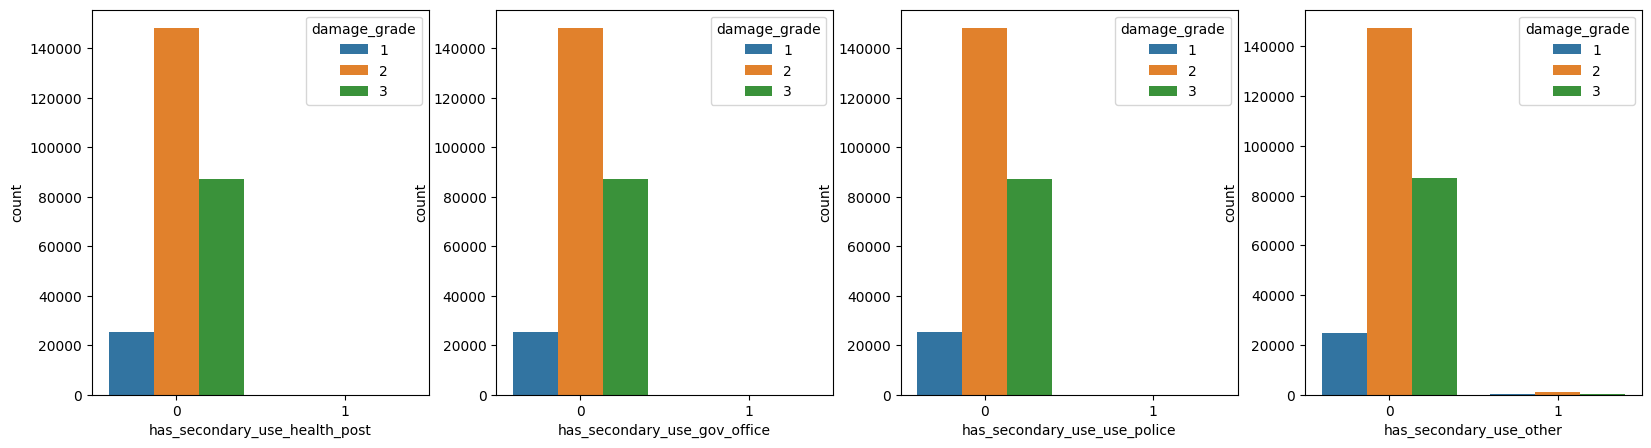

In [ ]:
fig , ax = plt.subplots(1,4, figsize = (20,5))
sns.countplot(x=train_data['has_secondary_use_health_post'] , hue=train_labels['damage_grade'] , ax = ax[0])
sns.countplot(x=train_data['has_secondary_use_gov_office'] , hue=train_labels['damage_grade'] , ax = ax[1])
sns.countplot(x=train_data['has_secondary_use_use_police'], hue=train_labels['damage_grade'] , ax=ax[2])
sns.countplot(x=train_data['has_secondary_use_other'] , hue=train_labels['damage_grade'], ax=ax[3])
plt.show()

# **Data Processing** <br>
In this contest, we tried target encoding and frequecny encoding. In addition, we tried to adjust the value in 'has_superstructrue_xxx_xxx' from 0,1 into the proportion.

In [ ]:
#Do the target Encoding for geo_level_id with repective to age, height_percentage, area_percentage and count_floors_pre_eq
geo_age_target = data.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id'])['age'].agg(['mean']).reset_index().rename(columns={'mean':'geo_age_target'})
geo_height_target = data.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id'])['height_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'geo_height_target'})
geo_area_target = data.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id'])['area_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'geo_area_target'})
geo_floor_target = data.groupby(['geo_level_1_id','geo_level_2_id','geo_level_3_id'])['count_floors_pre_eq'].agg(['mean']).reset_index().rename(columns={'mean':'geo_floor_target'})
geo_age_mean

,geo_level_1_id,geo_level_2_id,geo_level_3_id,geo_grp_age_mean
0,0,62,1418,15.000000
1,0,62,3149,16.250000
2,0,62,3181,13.888889
3,0,62,4066,12.000000
4,0,62,5354,17.857143
...,...,...,...,...
11856,30,1391,8191,17.500000
11857,30,1391,9788,41.666667
11858,30,1391,10129,60.000000
11859,30,1391,10950,49.500000


In [ ]:
#Do the target Encoding for some buildings_structure_type with repective to age, height_percentage, area_percentage and count_floors_pre_eq
type_age_target = data.groupby(['foundation_type','roof_type','ground_floor_type','other_floor_type'])['age'].agg(['mean']).reset_index().rename(columns={'mean':'type_age_target'})
type_height_target = data.groupby(['foundation_type','roof_type','ground_floor_type','other_floor_type'])['height_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'type_height_target'})
type_area_target = data.groupby(['foundation_type','roof_type','ground_floor_type','other_floor_type'])['area_percentage'].agg(['mean']).reset_index().rename(columns={'mean':'type_area_target'})

In [ ]:
#Try to change the value in has_superstructure_xxx_xxx to its proportion of all kind of material
has_feature = ['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag','has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick',
               'has_superstructure_cement_mortar_brick','has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_superstructure_other']
has_feature_sum = data[has_feature].sum(axis=1)
data.loc[:,'has_superstructure_adobe_mud' : 'has_superstructure_other'] = data.loc[:,'has_superstructure_adobe_mud' : 'has_superstructure_other'].div(has_feature_sum,axis=0)
data.loc[:,'has_superstructure_adobe_mud' : 'has_superstructure_other']

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,0.500000,0.500000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0
4,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
347464,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0
347465,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
347466,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0
347467,0.500000,0.500000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
def merge_targetEncoding(df1, df2, merge_on):
  merged_df = df1[merge_on]
  merged_df = merged_df.merge(df2, on=merge_on, how='left')
  new_columns = [col for col in list(merged_df) if col not in merge_on]
  df1 = pd.concat([df1, merged_df[new_columns]], axis=1)
  return df1

In [ ]:
data = merge_targetEncoding(data, geo_age_target, ['geo_level_1_id','geo_level_2_id','geo_level_3_id'])
data = merge_targetEncoding(data, geo_height_target, ['geo_level_1_id','geo_level_2_id','geo_level_3_id'])
data = merge_targetEncoding(data, geo_area_target, ['geo_level_1_id','geo_level_2_id','geo_level_3_id'])
data = merge_targetEncoding(data, geo_floor_target, ['geo_level_1_id','geo_level_2_id','geo_level_3_id'])

data = merge_targetEncoding(data, type_age_target, ['foundation_type','roof_type','ground_floor_type','other_floor_type'])
data = merge_targetEncoding(data, type_height_target, ['foundation_type','roof_type','ground_floor_type','other_floor_type'])
data = merge_targetEncoding(data, type_area_target, ['foundation_type','roof_type','ground_floor_type','other_floor_type'])

In [ ]:
from pandas.io.formats.format import ColspaceArgType
freq_cols = ['land_surface_condition','foundation_type','roof_type',
             'ground_floor_type','other_floor_type','position','plan_configuration',
             'legal_ownership_status']

def frequency_encode(cols, df, self_encoding=False):
  for c in cols:
    fq_dict = df[c].value_counts().to_dict()
    if self_encoding:
      df[c] = df[c].map(fq_dict)
    else:
      df[c+'fq_enc'] = df[c].map(fq_dict)
  return df
data_freq = frequency_encode(freq_cols, data, self_encoding=True)

# **Data split**
At first, we try to use train_test_split function to split the data to 8:2. After we do the cross-validation in training stage to find the best hyperparameter, and train the all data in training dataset, so the function train_test_split is no longer used. In addition, we have tried using SMOTE method to this imbalance dataset, but it didn't have obvious better performance in this contest. Thus, these method is also no longer used. <br>
This section also manage the data for our stack model. We mapped the data label to 0,1 for our first model, and extracted data which damage_grade is 1 or 3 to produce a new training dataset for our second model.

In [ ]:
data_new = data_freq.drop(columns=['building_id'],axis=1)
train = data_new[:train_data.shape[0]]
test = data_new[train_data.shape[0]:]
train_x, valid_x, train_y, valid_y = train_test_split(train, train_labels['damage_grade'], test_size = 0.2, stratify=train_labels['damage_grade'])

#smoteX, smoteY = SMOTE().fit_resample(train,train_labels['damage_grade'])
#tomeX, tomeY = TomekLinks().fit_resample(train,train_labels['damage_grade'])

In [ ]:
print("train data = ",len(train))
print("test data = ",len(test))

train data =  260601
test data =  86868


In [ ]:
import lightgbm as lgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
## Do one vs one for multiclassification -> split the dataset to binary classification
train_split = pd.concat([train_x,train_y],axis=1)
train_13 = train_split[train_split['damage_grade'].isin([1,3])]
train_2wO = train_split.copy()
train_2wO['damage_grade'] = train_split['damage_grade'].map({1:0, 2:1, 3:0})

train_x_2wO, valid_x_2wO, train_y_2wO, valid_y_2wO = train_test_split(train_2wO.iloc[:,:-1],train_2wO['damage_grade'], test_size = 0.2, stratify=train_2wO['damage_grade'])
train_x_13, valid_x_13, train_y_13, valid_y_13 = train_test_split(train_13.iloc[:,:-1],train_13['damage_grade'], test_size = 0.2, stratify=train_13['damage_grade'])

# **LightGBM Stack**
The first model is for distinguishing damage grade 2 or others, while the second is for damage grade 1 or 3.

In [ ]:
#Fine-tuned the first stack model with GridSearchCV
parameters = {
    'learning_rate' : [0.01,0.05,0.1,0.2],
    'num_leaves' : [30,80,130,200],
    'reg_lambda' :[1,1.2,1.4],
    'n_estimators' : [550,100,1300,1500]
}

lgb_grid_2wO = lgb.LGBMClassifier(min_child_samples=30,objective='binary', early_stopping_round=30, n_jobs=-1)

gsearch = GridSearchCV(lgb_grid_2wO, param_grid=parameters, cv=5)
gsearch.fit(train_x_2wO, train_y_2wO, eval_set=[(train_x_2wO,train_y_2wO),(valid_x_2wO,valid_y_2wO)])

Sometimes GridSearch is too long. When we wanted to adjust the hyperparameter by our experience, we did the k-fold to valid our assumption. Then we use the best hyperparameter we thought to train the whole model with all training data.

In [ ]:
skfold = StratifiedKFold(n_splits=5)
f1_result_2wO = []
best_iteration_2wO = []

# for fold_id, (train_ids, valid_ids) in enumerate(skfold.split(train_2wO.iloc[:,:-1],train_2wO['damage_grade'])) :
#   print("Fold %d / %d" % (fold_id + 1, 5))
#   x_train = train_2wO.iloc[train_ids,:-1]
#   y_train = train_2wO.iloc[train_ids,-1]
#   x_valid = train_2wO.iloc[valid_ids,:-1]
#   y_valid = train_2wO.iloc[valid_ids,-1]

#   lgb_2wO= lgb.LGBMClassifier(learning_rate = 0.07, n_estimators=1500, min_child_samples=40, num_leaves = 130, reg_lambda=1.6,objective='binary', early_stopping_round=30)
#   lgb_2wO.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_valid,y_valid)])
#   lgb2wO_predict = lgb_2wO.predict(x_valid)

#   f1_lgb_2wO = f1_score(y_valid, lgb2wO_predict,average='micro')
#   f1_result_2wO.append(f1_lgb_2wO)
#   best_iteration_2wO.append(lgb_2wO.best_iteration_)

lgb_2wO= lgb.LGBMClassifier(learning_rate = 0.07, n_estimators=742, min_child_samples=40, num_leaves = 130, reg_lambda=1.6,objective='binary')
lgb_2wO.fit(train_2wO.iloc[:,:-1],train_2wO['damage_grade'])

# print("lightgbm f1 score is %.5f" %(mean(f1_result_2wO))) #0.74929 -> learning_rate = 0.07
# print("best iteration is %.5f" %(mean(best_iteration_2wO))) #742

LGBMClassifier(learning_rate=0.07, min_child_samples=40, n_estimators=742,
               num_leaves=130, objective='binary', reg_lambda=1.6)

In [ ]:
#GridSearch the binary classification for grade 1 or 3
parameters = {
    'learning_rate' : [0.01,0.05,0.1,0.2],
    'num_leaves' : [30,80,130,200],
    'n_estimators' : [550,100,1300,1500]
}

lgb_grid_13 = lgb.LGBMClassifier(min_child_samples=30, reg_lambda=1.2,objective='binary', early_stopping_round=30, n_jobs=-1)

gsearch = GridSearchCV(lgb_grid_13, param_grid=parameters)
gsearch.fit(train_x_13, train_y_13, eval_set=[(train_x_13,train_y_13),(valid_x_13,valid_y_13)])

In [ ]:
f1_result_13 = []
n_estimators_13 = []
# for fold_id, (train_ids, valid_ids) in enumerate(skfold.split(train_13.iloc[:,:-1],train_13['damage_grade'])) :
#   print("Fold %d / %d" % (fold_id + 1, 5))
#   x_train = train_13.iloc[train_ids,:-1]
#   y_train = train_13.iloc[train_ids,-1]
#   x_valid = train_13.iloc[valid_ids,:-1]
#   y_valid = train_13.iloc[valid_ids,-1]

#   lgb_13= lgb.LGBMClassifier(learning_rate = 0.08, n_estimators=850, min_child_samples=40, num_leaves = 60, reg_lambda=1.6,objective='binary', early_stopping_round=30)
#   lgb_13.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_valid,y_valid)])
#   lgb13_predict = lgb_13.predict(x_valid)

#   f1_lgb_13 = f1_score(y_valid, lgb13_predict,average='micro')
#   f1_result_13.append(f1_lgb_13)
#   n_estimators_13.append(lgb_13.best_iteration_)

lgb_13= lgb.LGBMClassifier(learning_rate = 0.08, n_estimators=590,min_child_samples = 40,num_leaves = 60,reg_lambda=1.6,objective='binary')
lgb_13.fit(train_13.iloc[:,:-1],train_13['damage_grade'])

# print("lightgbm f1 score is %.5f" %(mean(f1_result_13))) # 0.94529 -> num_leaves=60, learning_rate = 0.08
# print("best iteration is ", mean(n_estimators_13)) # 590 iteration

LGBMClassifier(learning_rate=0.08, min_child_samples=40, n_estimators=590,
               num_leaves=60, objective='binary')

In [ ]:
#ensemble and predict the test data
import seaborn as sns
def stack_lgb(test, model1, model2) :
  test_stack_yn = model1.predict(test)
  x = pd.DataFrame(test_stack_yn.reshape(-1,1), columns = ['damage_grade'], index=None)
  next_test = pd.concat([test.reset_index(),x],axis=1)

  next_test = next_test[next_test['damage_grade'] == 0]
  next_test = next_test.iloc[:,1:-1]
  test_stack_13 = model2.predict(next_test)

  pointer13 = 0
  for i in range (len(test_stack_yn)) :
    if test_stack_yn[i] == 0 :
      test_stack_yn[i] = test_stack_13[pointer13]
      pointer13 = pointer13 + 1
    else :
      test_stack_yn[i] = 2

  return test_stack_yn

# valid_stack_y = stack_lgb(valid_x,lgb_2wO,lgb_13)
# f1_lgb = f1_score(valid_y, valid_stack_y,average='micro')

52121


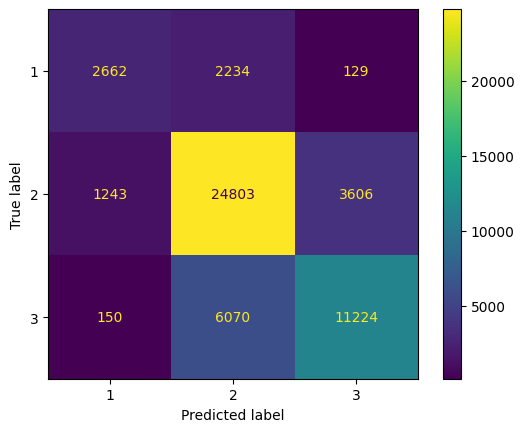

In [ ]:
#At first we split the data for train and valid, so this is the confusion array about the predict result which only use 80% training dataset and the real label
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(len(valid_y))
cm_stack = confusion_matrix(valid_y, valid_stack_y)
cm_stack_distplay = ConfusionMatrixDisplay(cm_stack, display_labels=['1','2','3']).plot()

In [ ]:
test_stack_yn = stack_lgb(test,lgb_2wO,lgb_13)
submit_data_stack = pd.concat([test_data['building_id'],pd.DataFrame(test_stack_yn.reshape(-1,1),columns=['damage_grade'])],axis = 1)

[    0  6826 55348 24694]


<Axes: xlabel='damage_grade', ylabel='count'>

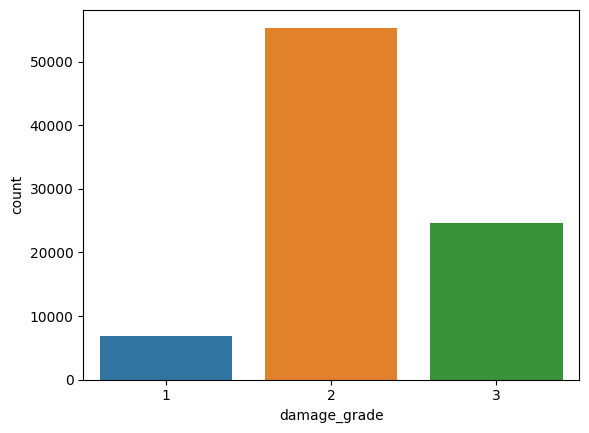

In [ ]:
print(np.bincount(test_stack_yn))
sns.countplot(x=submit_data_stack['damage_grade'])

In [ ]:
#submit_data_stack.to_csv('/content/gdrive/MyDrive/CSCI_567_project/0420-stack.csv',index=False)

# **CatBoost**
We try the CatBoost with GridSearch, but the best f1 score we get is only 0.7441 in the leaderboard

In [ ]:
#GridSearch the CatBoost
params = {
    'iterations': 5000,
    'cat_features': [7, 8, 9, 10, 11, 12, 13, 25],
    'loss_function': 'MultiClass',
    'eval_metric' : 'TotalF1',
    'early_stopping_rounds' : 50,
    'task_type': 'GPU',
    'devices': '0:1'
}
cgb = CatBoostClassifier(**params)

grid = {'learning_rate': [0.05,0.08,0.1,0.15,0.2],
        'depth': [6,7,8,9,10,11,12],
        'l2_leaf_reg': [3,4,5,6,7]}

grid_search_result = cgb.grid_search(grid, X = train, y = train_labels['damage_grade'], cv=5)

Streaming output truncated to the last 5000 lines.
252:	learn: 0.7938224	test: 0.7310818	best: 0.7314558 (249)	total: 37.8s	remaining: 11m 49s
253:	learn: 0.7938869	test: 0.7311004	best: 0.7314558 (249)	total: 38s	remaining: 11m 49s
254:	learn: 0.7941158	test: 0.7310096	best: 0.7314558 (249)	total: 38.1s	remaining: 11m 48s
255:	learn: 0.7942584	test: 0.7311147	best: 0.7314558 (249)	total: 38.2s	remaining: 11m 48s
256:	learn: 0.7942612	test: 0.7312222	best: 0.7314558 (249)	total: 38.3s	remaining: 11m 47s
257:	learn: 0.7942426	test: 0.7313240	best: 0.7314558 (249)	total: 38.4s	remaining: 11m 46s
258:	learn: 0.7946254	test: 0.7314972	best: 0.7314972 (258)	total: 38.6s	remaining: 11m 46s
259:	learn: 0.7948413	test: 0.7315951	best: 0.7315951 (259)	total: 38.7s	remaining: 11m 45s
260:	learn: 0.7953002	test: 0.7315605	best: 0.7315951 (259)	total: 38.9s	remaining: 11m 45s
261:	learn: 0.7956759	test: 0.7314734	best: 0.7315951 (259)	total: 39s	remaining: 11m 45s
262:	learn: 0.7958536	test: 0.731

In [ ]:
print(grid_search_result['params'])

{'depth': 10, 'l2_leaf_reg': 6, 'learning_rate': 0.1}


In [ ]:
#catboost
params_catboost = {
    'iterations': 1000,
    'loss_function': 'MultiClass',
    'eval_metric' : 'TotalF1',
    'learning_rate': 0.1,
    'l2_leaf_reg': 6,
    'depth' : 10,
    'task_type': "GPU",
    'devices': '0:1',
    'early_stopping_rounds' : 20
}
#This commitment is for training model with whole dataset when we find the best hyperparameter
# cgbModel = CatBoostClassifier(**params_catboost)
# cgbModel.fit(
#     train, train_labels['damage_grade'],
#     logging_level = 'Verbose'
# )
skfold = StratifiedKFold(n_splits=5)
f1_result_cgb = []
best_iteration_cgb = []
for fold_id, (train_ids, valid_ids) in enumerate(skfold.split(smoteX,smoteY)) :
  print("Fold %d / %d" % (fold_id + 1, 5))
  x_train = smoteX.iloc[train_ids,:]
  y_train = smoteY.iloc[train_ids]
  x_valid = smoteX.iloc[valid_ids,:]
  y_valid = smoteY.iloc[valid_ids]

  cgbModel = CatBoostClassifier(**params_catboost)
  cgbModel.fit(x_train, y_train,eval_set=[(x_valid,y_valid)],logging_level = 'Verbose')
  cgb_predict = cgbModel.predict(x_valid)

  f1_cgb = f1_score(y_valid, cgb_predict,average='micro')
  f1_result_cgb.append(f1_cgb)
  best_iteration_cgb.append(cgbModel.get_best_iteration())

print("f1 score = ", mean(f1_result_cgb))
print("best iteration", mean(best_iteration_cgb))

Fold 1 / 5
0:	learn: 0.6413631	test: 0.6201733	best: 0.6201733 (0)	total: 134ms	remaining: 2m 13s
1:	learn: 0.6459003	test: 0.6230537	best: 0.6230537 (1)	total: 261ms	remaining: 2m 10s
2:	learn: 0.6558666	test: 0.6249939	best: 0.6249939 (2)	total: 402ms	remaining: 2m 13s
3:	learn: 0.6604850	test: 0.6245617	best: 0.6249939 (2)	total: 529ms	remaining: 2m 11s
4:	learn: 0.6638637	test: 0.6235480	best: 0.6249939 (2)	total: 656ms	remaining: 2m 10s
5:	learn: 0.6642827	test: 0.6229422	best: 0.6249939 (2)	total: 782ms	remaining: 2m 9s
6:	learn: 0.6713027	test: 0.6253382	best: 0.6253382 (6)	total: 905ms	remaining: 2m 8s
7:	learn: 0.6759440	test: 0.6262370	best: 0.6262370 (7)	total: 1.01s	remaining: 2m 5s
8:	learn: 0.6794049	test: 0.6299768	best: 0.6299768 (8)	total: 1.08s	remaining: 1m 59s
9:	learn: 0.6839491	test: 0.6320220	best: 0.6320220 (9)	total: 1.14s	remaining: 1m 53s
10:	learn: 0.6880887	test: 0.6311856	best: 0.6320220 (9)	total: 1.2s	remaining: 1m 47s
11:	learn: 0.6910768	test: 0.631182

In [ ]:
print(f1_result_cgb)
print(best_iteration_cgb)

[0.7614589129141804, 0.7588833461243286, 0.766346891788181, 0.7626822716807368, 0.7638526477359938]
[388, 388, 388, 388, 388]


In [ ]:
cgb_test_predict = cgbModel.predict(test)
cgb_submit_data = pd.concat([test_data['building_id'],pd.DataFrame(cgb_test_predict,columns=['damage_grade'])],axis = 1)

<Axes: xlabel='damage_grade', ylabel='count'>

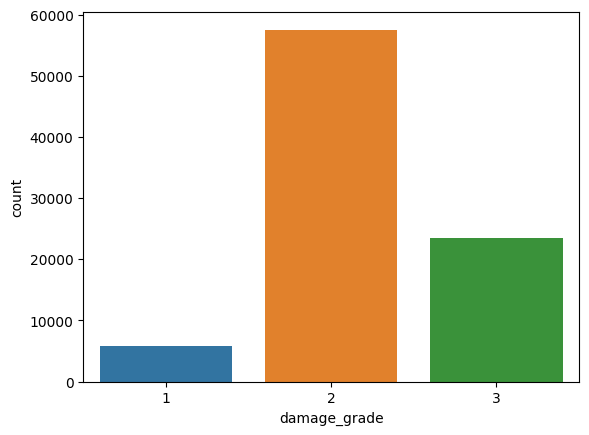

In [ ]:
import seaborn as sns
sns.countplot(x=cgb_submit_data['damage_grade'])

In [ ]:
cgb_submit_data.to_csv('/content/gdrive/MyDrive/CSCI_567_project/0420-cgb.csv',index=False)

# **LightGBM**
We have done the same approach like above


In [ ]:
#lightGBM grid search
parameters = {
  "reg_lambda" :[1.6,1.8,2.0,2.2],
  "num_leaves" : [30,60,90,120],
  "learning_rate" : [0.05,0.07,0.1,0.15],
}

lgb_grid = lgb.LGBMClassifier(min_child_weight=0.001, n_estimators = 850,objective='multiclass',num_class=3, early_stopping_round=10)

gsearch_lgb = GridSearchCV(lgb_grid, param_grid=parameters)
gsearch_lgb.fit(train_x, train_y,eval_set=[(train_x,train_y),(valid_x,valid_y)])

In [ ]:
print("Best score: %0.3f" % gsearch_lgb.best_score_)
print("Best parameters set:")
best_parameters = gsearch_lgb.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
#It is the same way with Catboost
f1_result_lgb = []
n_estimators_lgb = []
skfold = StratifiedKFold(n_splits=5)

for fold_id, (train_ids, valid_ids) in enumerate(skfold.split(train,train_labels['damage_grade'])) :
  print("Fold %d / %d" % (fold_id + 1, 5))
  x_train = train.iloc[train_ids,:]
  y_train = train_labels.iloc[train_ids,-1]
  x_valid = train.iloc[valid_ids,:]
  y_valid = train_labels.iloc[valid_ids,-1]

  lgbModel = lgb.LGBMClassifier(learning_rate = 0.07,min_child_weight=0.001, n_estimators=850, min_child_samples=40, num_leaves = 90, reg_lambda=2,objective='multiclass', early_stopping_round=10)
  lgbModel.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_valid,y_valid)])
  lgb_predict = lgbModel.predict(x_valid)

  f1_lgb = f1_score(y_valid, lgb_predict,average='micro')
  f1_result_lgb.append(f1_lgb)
  n_estimators_lgb.append(lgbModel.best_iteration_)

print("average f1 score %.5f" %(mean(f1_result_lgb))) #reg=2 0.7505 -> 690
print("best iteration ", mean(n_estimators_lgb))

In [ ]:
print(f1_result_lgb)
print(n_estimators_lgb)

[0.7512518946298037, 0.7459708365310821, 0.7536262471220261, 0.7503453568687644, 0.7506715272448196]
[792, 717, 796, 829, 707]


In [ ]:
#lightGBM for valid -> final model parameter
model = lgb.LGBMClassifier(learning_rate = 0.07, min_child_weight=0.001, n_estimators=850,min_child_samples = 40, reg_lambda=2,
                          num_leaves = 90,objective='multiclass',num_class=3)
model.fit(train,train_labels['damage_grade'])

LGBMClassifier(learning_rate=0.07, min_child_samples=40, n_estimators=850,
               num_class=3, num_leaves=90, objective='multiclass',
               reg_lambda=2)

In [ ]:
lgb_test_predict = model.predict(test)
lgb_submit_data = pd.concat([test_data['building_id'],pd.DataFrame(lgb_test_predict,columns=['damage_grade'])],axis = 1)

<Axes: xlabel='damage_grade', ylabel='count'>

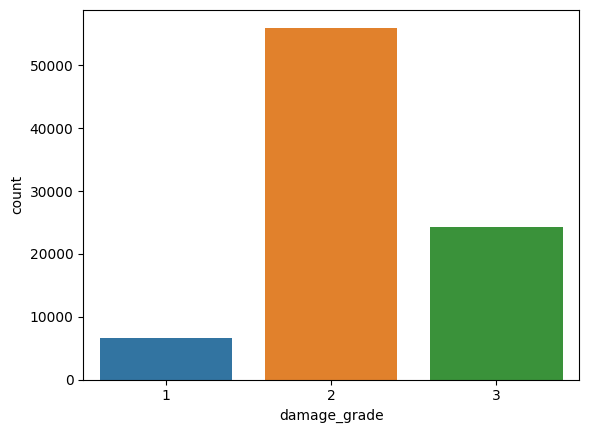

In [ ]:
sns.countplot(x=lgb_submit_data['damage_grade'])

In [ ]:
#lgb_submit_data.to_csv('/content/gdrive/MyDrive/CSCI_567_project/0420-lgb.csv',index=False)

# **XGBoost**
Same approach to CatBoost


In [ ]:
##xgb gridsearch
xgb_train_y = train_y - 1
xgb_valid_y = valid_y - 1

parameters = {
    'max_depth': [5, 10, 15, 20, 25],
    'learning_rate': [0.05, 0.08, 0.1, 0.15, 0.2],
    'gamma':[i/10.0 for i in range(0,5)]
}

xlf = XGBClassifier(n_estimators=2000, objective='multi:softmax', num_class=3, eval_metric='mlogloss', early_stopping_rounds=30,
                    tree_method = 'gpu_hist',gpu_id = 0)

gsearch = GridSearchCV(xlf, param_grid=parameters, scoring='f1_micro')
gsearch.fit(train_x, xgb_train_y, eval_set=[(train_x, xgb_train_y),(valid_x, xgb_valid_y)])

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7f35d2a970a0>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 500, in _next_wrapper
    def _next_wrapper(self, this: None) -> int:  # pylint: disable=unused-argument
KeyboardInterrupt: 


In [ ]:
print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
#XGboost
xgb_train_y = train_labels['damage_grade'] - 1
xgb_valid_y = valid_y - 1

params_xgb = {
    'objective' : 'multi:softmax',
    'tree_method' : 'gpu_hist',
    'gpu_id' : 0,
    'max_depth' : 10,
    'min_child_weight' : 1,
    'num_class' : 3,
    'eval_metric' : 'mlogloss',
    'learning_rate' : 0.1,
    'n_estimators' : 330
}
xgb = XGBClassifier(**params_xgb)
xgb.fit(train,xgb_train_y)
# xgb_predict = xgb.predict(valid_x)

# f1_result_xgb = []
# n_estimators_xgb = []
# skfold = StratifiedKFold(n_splits=5)

# for fold_id, (train_ids, valid_ids) in enumerate(skfold.split(train,train_labels['damage_grade'])) :
#   print("Fold %d / %d" % (fold_id + 1, 5))
#   x_train = train.iloc[train_ids,:]
#   y_train = train_labels.iloc[train_ids,-1]
#   x_valid = train.iloc[valid_ids,:]
#   y_valid = train_labels.iloc[valid_ids,-1]
#   y_train = y_train -1
#   y_valid = y_valid -1

#   xgbModel = XGBClassifier(**params_xgb)
#   xgbModel.fit(x_train,y_train, eval_set=[(x_train,y_train),(x_valid,y_valid)])
#   lgb_predict = xgbModel.predict(x_valid)

#   f1_xgb = f1_score(y_valid, lgb_predict,average='micro')
#   f1_result_xgb.append(f1_xgb)
#   n_estimators_xgb.append(xgbModel.best_iteration)

# print("average f1 score %.5f" %(mean(f1_result_xgb))) #reg=2 0.7505 -> 690
# print("best iteration ", mean(n_estimators_xgb))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=330, n_jobs=None,
              num_class=3, num_parallel_tree=None, objective='multi:softmax', ...)

# **RandomForest**

In [ ]:
#RandomForest
forest = RandomForestClassifier(random_state=8, n_estimators = 250, min_samples_split = 20, oob_score = True)
forest.fit(train_x, train_y)

forest_predict = forest.predict(valid_x)
f1 = f1_score(valid_y, forest_predict,average='micro')
print("Base oob score : %.5f   and base f1 score : %.5f" %(forest.oob_score_,f1))

Base oob score : 0.74298   and base f1 score : 0.74360


# **Ensemble Model**



In [ ]:
## ensemble catboost, lightgbm, randomforest to predict using bagging
from scipy.stats import mode
def ensemble_model (cgb,lgbm,rf,isVal=True, valid_data = None) :
  ensemble = np.hstack((cgb,lgbm.reshape(-1,1),rf.reshape(-1,1)))

  if isVal :
    ensemble_predict = mode(ensemble,axis=1)
    f1_ensemble = f1_score(valid_data,ensemble_predict.mode, average='micro')
    print("xgboost f1 score is : %.5f" %(f1_ensemble))
  else :
    ensemble_predict = mode(ensemble,axis=1)
    return ensemble_predict.mode

# ensemble_model(cgb_test_predict, lgb_predict, xgb_predict, isVal=True, valid_data=valid_y)

In [ ]:
## test_data predict
test_cgb = cgbModel.predict(test)
test_lgb = model.predict(test)
# test_forest = forest.predict(test)
test_xgb = xgb.predict(test)
test_xgb = test_xgb + 1

predict = ensemble_model(test_cgb,test_lgb,test_xgb, isVal=False)

<ipython-input-38-7ab9fbc077c9>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ensemble_predict = mode(ensemble,axis=1)


# **Confusion Matrix**
This section is only to see the distribution the model predict compared to the real label.

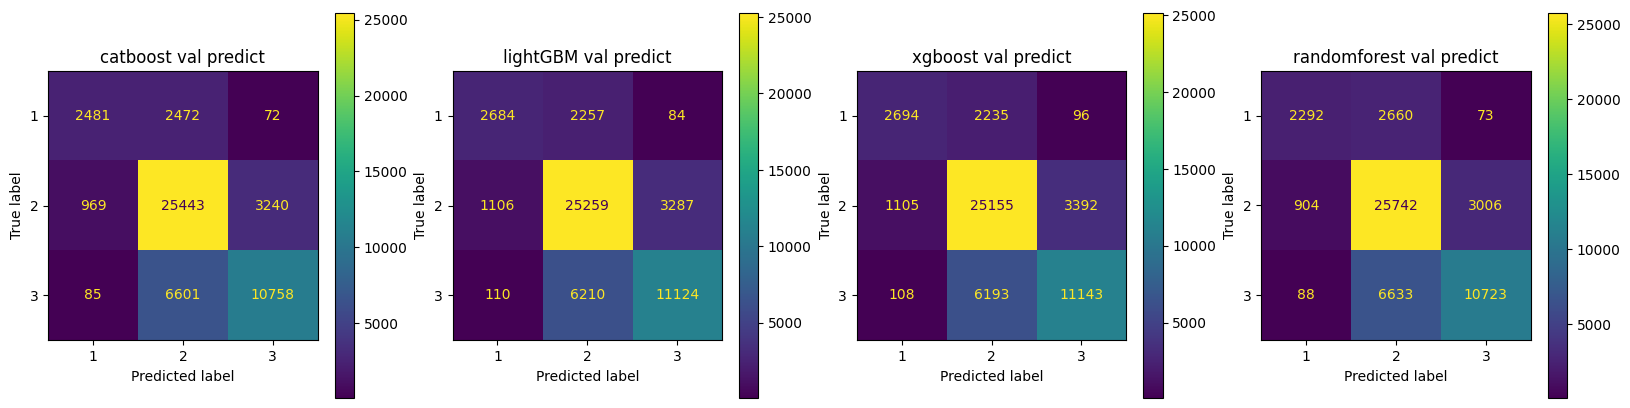

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,4, figsize=(20,5))

cm_cgb = confusion_matrix(valid_y,cgb_test_predict)
cm_cgb_display = ConfusionMatrixDisplay(cm_cgb,display_labels = ['1', '2', '3']).plot(ax = ax[0])
cm_cgb_display.ax_.set_title("catboost val predict")

cm_lgb = confusion_matrix(valid_y,lgb_predict)
cm_lgb_display = ConfusionMatrixDisplay(cm_lgb,display_labels = ['1', '2', '3']).plot(ax = ax[1])
cm_lgb_display.ax_.set_title("lightGBM val predict")

cm_xgb = confusion_matrix(valid_y,xgb_predict)
cm_xgb_display = ConfusionMatrixDisplay(cm_xgb,display_labels = ['1', '2', '3']).plot(ax = ax[2])
cm_xgb_display.ax_.set_title("xgboost val predict")

cm_rf = confusion_matrix(valid_y,forest_predict)
cm_rf_display = ConfusionMatrixDisplay(cm_rf,display_labels = ['1', '2', '3']).plot(ax = ax[3])
cm_rf_display.ax_.set_title("randomforest val predict")
plt.show()

In [ ]:
#test_predict = model.predict(test)

submit_data = pd.concat([test_data['building_id'],pd.DataFrame(predict,columns=['damage_grade'])],axis = 1)
submit_data.head(5)

,building_id,damage_grade
0,300051,3
1,99355,2
2,890251,2
3,745817,1
4,421793,3


<Axes: xlabel='damage_grade', ylabel='count'>

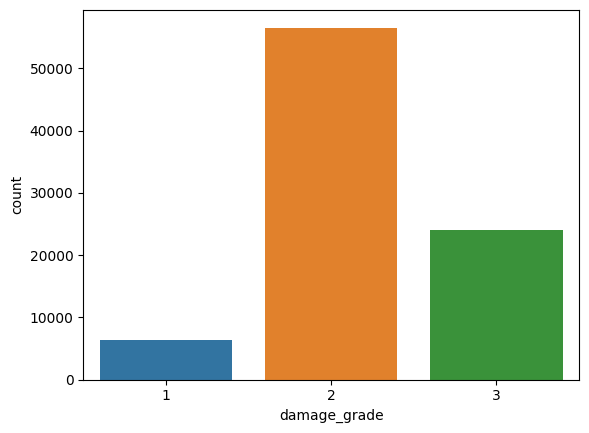

In [ ]:
sns.countplot(x=submit_data['damage_grade'])

In [ ]:
submit_data.to_csv('/content/gdrive/MyDrive/CSCI_567_project/0420_ensemble.csv',index=False)